In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [52]:
#Load the dataset
df = pd.read_csv('/Users/peggy/Downloads/House_Data/kc_house_data.csv')
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


## Data cleaning

In [53]:
#Check missing data
df.isnull().any().any()

False

In [54]:
#Check data type of each column
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [55]:
#Convert date column into datetime format
df.date = pd.to_datetime(df.date) 

#Convert zip code, yr_built and yr_renovated column into string
df['zipcode'] = df.zipcode.apply(str)
df['yr_built'] = df.yr_built.apply(str)
df['yr_renovated'] = df.yr_renovated.apply(str)

df.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                 object
yr_renovated             object
zipcode                  object
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

## Exploratory Data Analysis (EDA)

### Distribution of Housing Prices in King County

- Look into the distribution of housing prices using distribution plot and Empirical Cumulative Distribution Function (ECDF).
- The distribution of house prices are deviated from normal distribution and are skewed to the right, we should take log of house price for further analysis.
- From ECDF plot, we can see that there are 3 houses with prices over $6M, which deviate from normal price distribution.

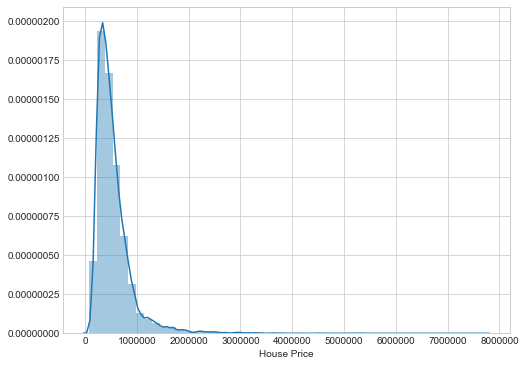

In [56]:
#Distribution plot
import seaborn as sns

fig = plt.figure(figsize = (8,6))
ax = sns.distplot(df.price)
ax.set(xlabel = 'House Price')
plt.show()


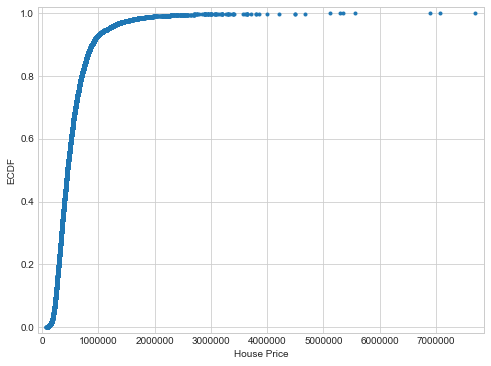

(array([   75000.,    78000.,    80000., ...,  6885000.,  7062500.,
         7700000.]),
 array([  4.62684495e-05,   9.25368991e-05,   1.38805349e-04, ...,
          9.99907463e-01,   9.99953732e-01,   1.00000000e+00]))

In [57]:
#ECDF 
historical_price = df[['price']]

def ecdf(data):
    n = len(data)
    x = np.sort(data.iloc[:,0])
    y = np.arange(1, n+1) / n
    _ = plt.figure(figsize = (8,6))
    _ = plt.plot(x, y, marker = '.', linestyle = 'none')
    _ = plt.xlabel('House Price')
    _ = plt.ylabel('ECDF')
    plt.margins(0.02)
    plt.show()
    return x, y

ecdf(historical_price)


#### Zip Code & Housing Price

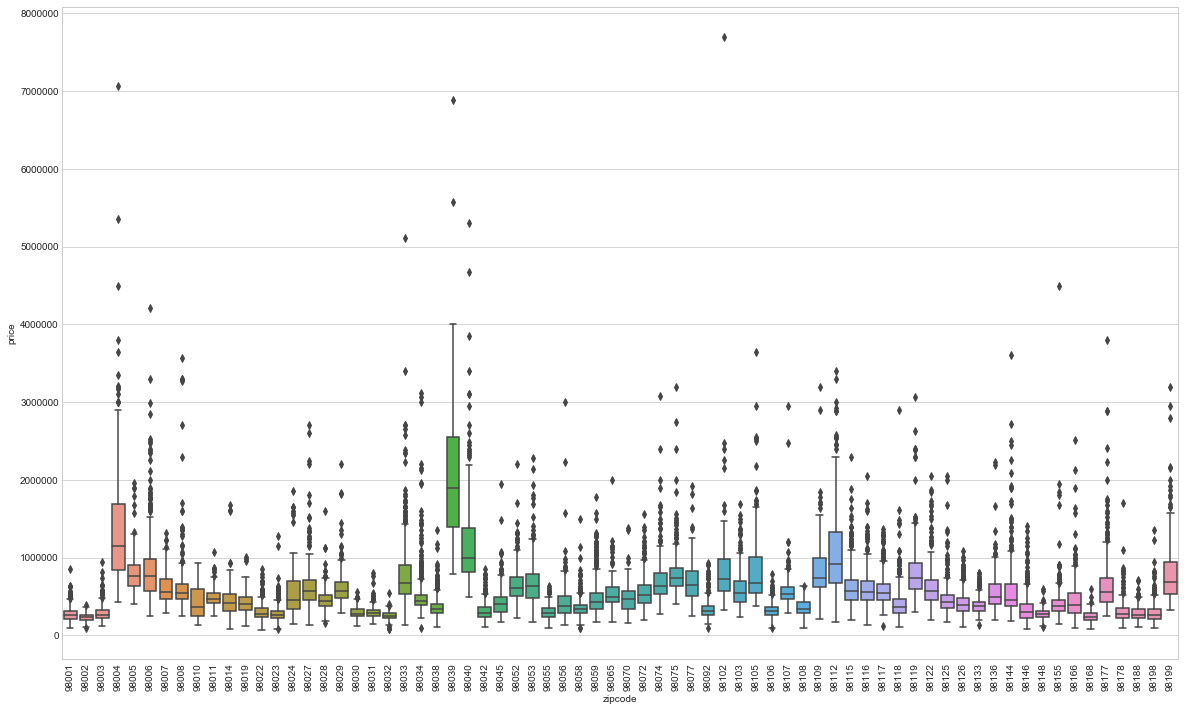

In [58]:
#Boxplot - Housing price
zipcodePrice = df[['zipcode', 'price']]

sns.set_style('whitegrid')
plt.figure(figsize = (20,12))
sns.boxplot(x = 'zipcode', y = 'price', data = zipcodePrice)
plt.xticks(rotation = 90)
plt.show()


In [59]:
#Median house prices based on zip code
zipcodePriceMedian = zipcodePrice.groupby(['zipcode'], as_index = False).median().rename(columns = {'price': 'median_price'})
zipcodePriceMedian = zipcodePriceMedian.sort_values(by = ['median_price'], ascending = False)

zipcodePriceMedian.head()

,zipcode,median_price
24,98039,1892500.0
3,98004,1150000.0
25,98040,993750.0
48,98112,915000.0
4,98005,765475.0


According to median house prices based on zip code, we can know that median house prices are high in zip code 98039, 98004, 98040, 98112 and 98005.

### Do areas with higher house prices also have higher income?

- Added King County's median household income in the past 12 months to see if areas with higher house prices also have higher income.

- Data source: https://censusreporter.org/data/table/?table=B19013&geo_ids=05000US53033,860|05000US53033&primary_geo_id=05000US53033

In [60]:
zipcodeList = df.zipcode.unique().tolist() #Make a list of zip code

In [61]:
# Import King County median income data
incomeDF = pd.read_csv('/Users/peggy/Downloads/kingCountyIncome.csv').iloc[1:]
incomeDF = incomeDF[['name', 'B19013001']].rename(columns = {'name': 'zipcode', 'B19013001': 'median_income'})
incomeDF.head()


,zipcode,median_income
1,98001,73782
2,98002,47184
3,98003,48724
4,98004,108905
5,98005,96767


In [62]:
incomeMedian = incomeDF[incomeDF['zipcode'].isin(zipcodeList)].reset_index(drop = True) #Selecting assigned zip codes 
incomeMedian = incomeMedian.sort_values(by = ['median_income'], ascending = False)
incomeMedian.head()


,zipcode,median_income
24,98039,182604
38,98075,159000
37,98074,156147
39,98077,132334
25,98040,129348


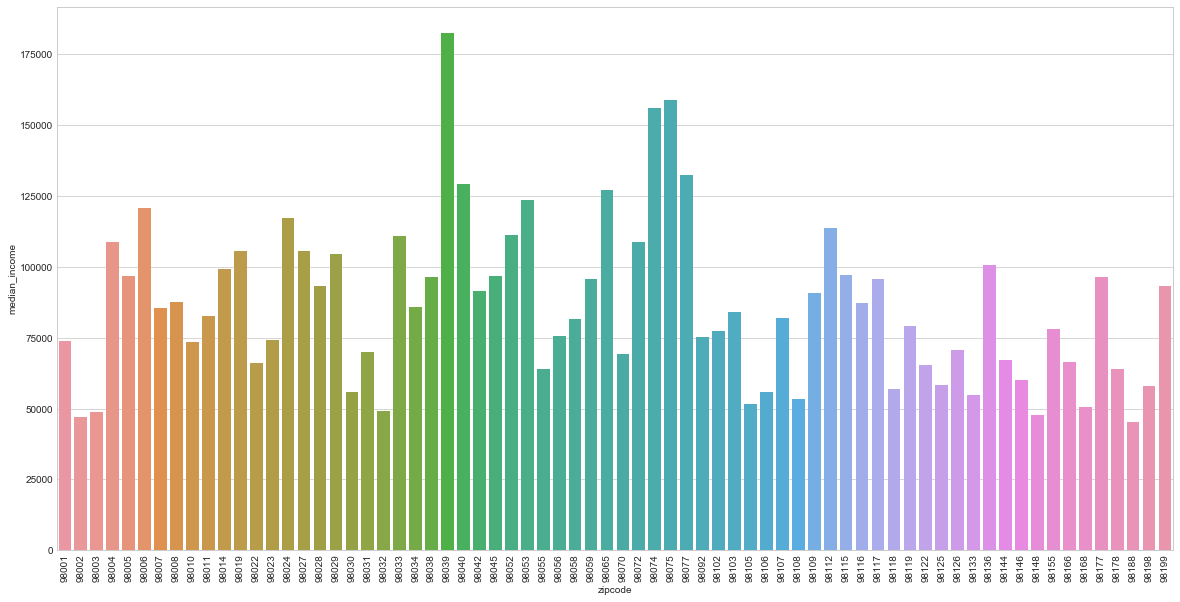

In [63]:
#Barplot - Median income

sns.set_style('whitegrid')
plt.figure(figsize = (20,10))
medianIncome = sns.barplot(x = 'zipcode', y = 'median_income', data = incomeMedian)
plt.xticks(rotation = 90)
plt.show()


The graphs above shows that most of the areas with higher house prices seems to have higher income, but we need to do a simple linear regression to see if the house price and income are statistical significant and the correlation coefficient between house price and income.

### Linear Regression(OLS) - House prices vs Median Income

In [64]:
houseIncomeMedian = pd.concat([zipcodePriceMedian, incomeMedian], axis = 1) #Concatenate two dataframes
houseIncomeMedian = houseIncomeMedian.loc[:,~houseIncomeMedian.columns.duplicated()] #Remove duplicate columns

houseIncomeMedian.head()

,zipcode,median_price,median_income
0,98001,260000.0,73782
1,98002,235000.0,47184
2,98003,267475.0,48724
3,98004,1150000.0,108905
4,98005,765475.0,96767


In [65]:
from statsmodels.formula.api import ols
#Linear Regression - Ordinary Least Squares
#Take log of median house price and median income since both are not normally distributed
m = ols('np.log(median_price) ~ np.log(median_income)', houseIncomeMedian).fit()
print(m.summary())


                             OLS Regression Results                             
Dep. Variable:     np.log(median_price)   R-squared:                       0.542
Model:                              OLS   Adj. R-squared:                  0.535
Method:                   Least Squares   F-statistic:                     80.39
Date:                  Sun, 11 Feb 2018   Prob (F-statistic):           3.89e-13
Time:                          16:43:32   Log-Likelihood:                -10.606
No. Observations:                    70   AIC:                             25.21
Df Residuals:                        68   BIC:                             29.71
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept 

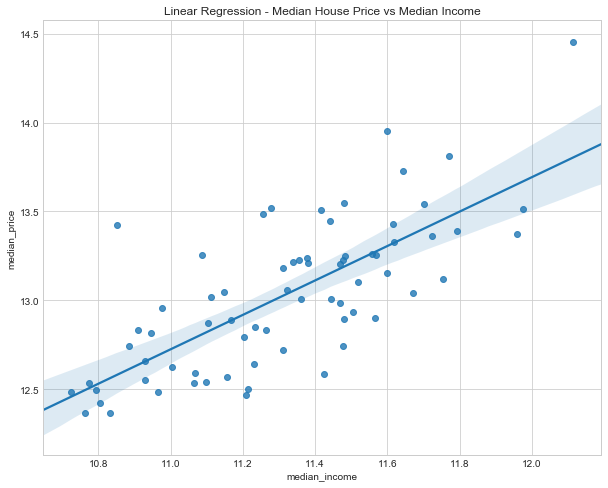

In [66]:
x, y = np.log(houseIncomeMedian.median_income), np.log(houseIncomeMedian.median_price)
plt.figure(figsize = (10,8))
plt.title('Linear Regression - Median House Price vs Median Income')
sns.regplot(x = x, y = y, data = houseIncomeMedian)
plt.show()


- From OLS regression results, the house price and income are statistical significant and the coefficient between house price and income is 0.967.
- From the regression plot, we can see that median house price and median income are positively correlated.

### Where are those houses located in? 
- Create a map of city neighborhoods using Python Basemap. 
- Each marker presents location and house price, and the bar at the right is price range.

/Users/peggy/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()


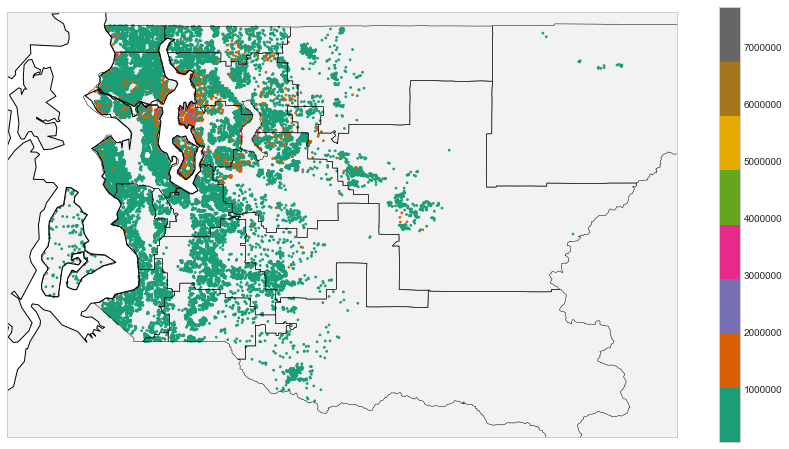

In [67]:
from mpl_toolkits.basemap import Basemap
#%matplotlib inline
#import matplotlib.pyplot as plt
#import mpld3

#mpld3.enable_notebook()

fig2 = plt.figure(figsize = (15,8))
m = Basemap(projection = 'mill',
            llcrnrlat = 47.1, llcrnrlon = -122.6, 
            urcrnrlat = 47.8, urcrnrlon = -121.2, resolution = 'h')

m.drawcoastlines()
m.drawcountries(linewidth = 2)
m.drawstates(color = 'b')
m.fillcontinents(color = '#f2f2f2', lake_color = 'aqua', zorder = 1)
m.readshapefile('/Users/peggy/Downloads/School_Districts_in_King_County__schdst_area/School_Districts_in_King_County__schdst_area', 'zipcode', drawbounds = True)
                 
ax = fig2.add_subplot(111)
x, y = m(np.array(df['long']), np.array(df['lat']))
scatter1 = ax.scatter(x, y, s = 3, 
                      c = np.array(df['price']),
                      marker = 'o', zorder = 1.5, 
                      cmap = plt.cm.Dark2)
plt.colorbar(scatter1)
plt.show()


### Correlation Heatmap 
Use heatmap to see the correlation between each attribute.

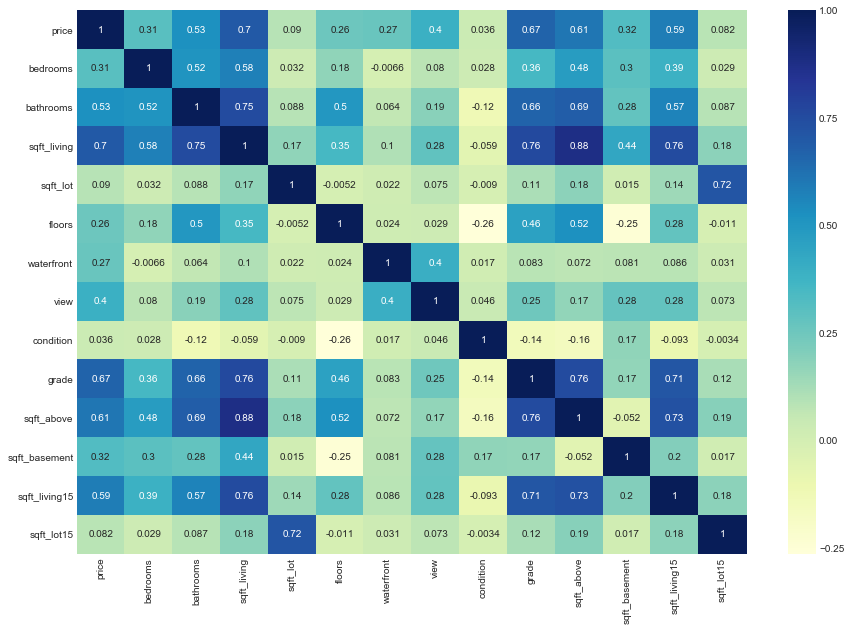

In [68]:
#Correlation

corrmap = df.drop(['id', 'date', 'zipcode', 'long', 'lat'], axis = 1).corr()
f, ax = plt.subplots(figsize = (15,10))
sns.heatmap(corrmap, cmap="YlGnBu", annot = True)
plt.show()


We use the correlation heatmap to see if there's multicollinearity between variables. Usually, if two variables have over 90% correlation, we should consider variables have multicollinearity issue. Based on the heatmap above, correlations between variables are < 90%, we can say there's no multicollinearity issue.


### Dummy Variables: Convert 'sqft_basement', 'yr_renovated' and 'view' into dummy variables
From the variable 'sqft_basement', 'yr_renoveted' and 'view', the goal is to find out if house prices are affected by variables w/wo basement, w/wo renovation and w/wo views. Therefore, it would be better to convert 'sqft_basement' 'yr_renovated' and 'view' in to dummy variables for further analysis.

In [69]:
#Replace values into 0 and 1
df['sqft_basement'] = np.where(df['sqft_basement'] != 0, 1, 0)
df['yr_renovated'] = np.where(df['yr_renovated'] != '0', '1', '0')
df['view'] = np.where(df['view'] != 0, 1, 0)
df.yr_renovated = df.yr_renovated.apply(pd.to_numeric)


In [70]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,1,1951,1,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,1,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Check variables 'grade'
When we first look at variables 'grade' and 'condition', we cannot easily know what those variables represent. We can use boxplot to plot out the relationship between those variables and house price.

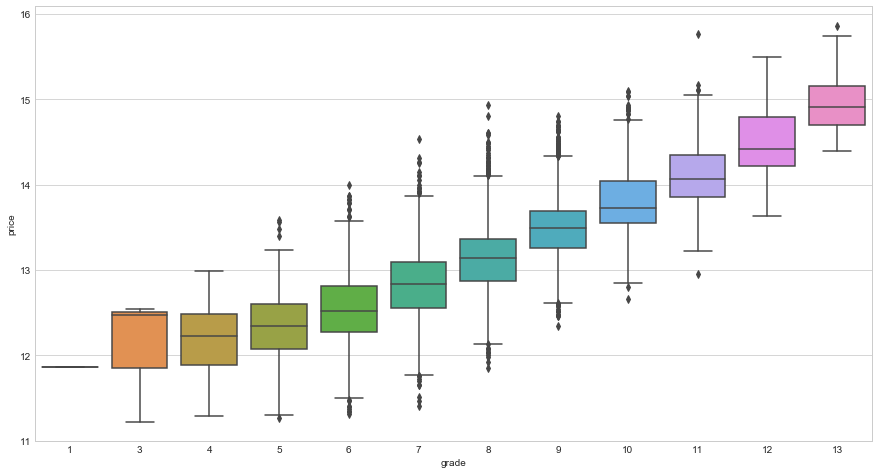

In [71]:
#Box plot- grade & price
fig = plt.figure(figsize = (15, 8))
sns.boxplot(x = df.grade, y = np.log(df.price))
plt.show()


From the above boxplot, obviously houses with higher grade tend to have higher prices.

### Check variable 'bathrooms'

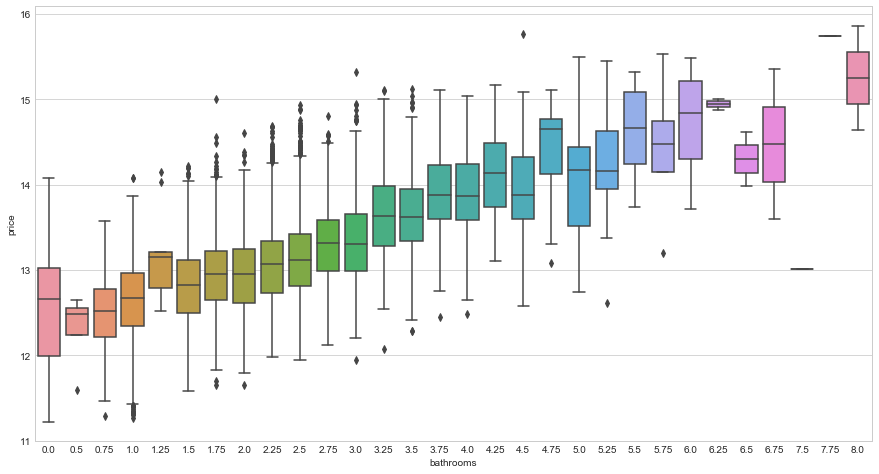

In [72]:
#Box plot- bathrooms & price
fig = plt.figure(figsize = (15, 8))
sns.boxplot(x = df.bathrooms, y = np.log(df.price))
plt.show()


From the boxplot, we can see that there are houses with 0 bathroom, which is not reasonable. Thus, we drop out houses with 0 bathroom.

In [74]:
df = df[df['bathrooms'] != 0]
print(df.shape)

(21603, 21)


## Feature Engineering

### Normality test on variables

Check whether variables are normally distributed before applying models.
- First, plot out histograms to have a quick look on the distribution of each variable.
- Use skewness to check normality. Skewness close to 0 is normal distribution, with skewness > 0 means the left tail of the distribution is more weighted.

#### Histogram

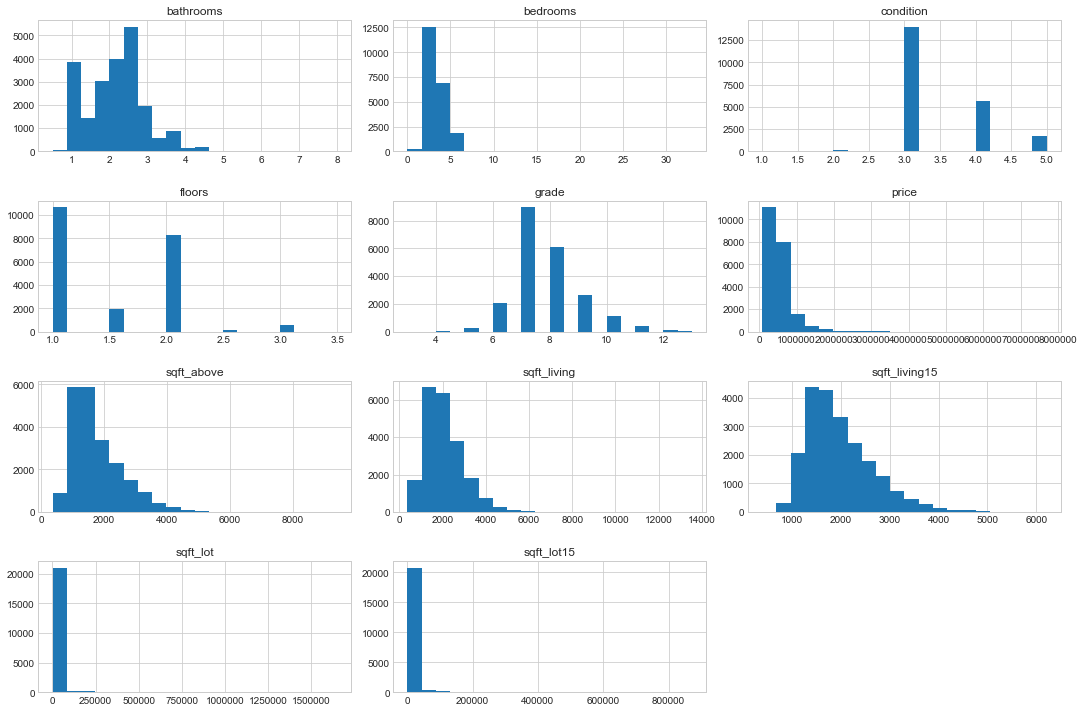

In [75]:
#Histogram 
vifDF = df.drop(['id', 'date', 'lat', 'long', 'zipcode', 'yr_built'], axis = 1)  
histplot = vifDF.drop(['waterfront', 'view', 'sqft_basement', 'yr_renovated'], axis = 1)

histplot.hist(bins = 20, figsize = (15,10))
plt.tight_layout()
plt.show()


The histograms above shows that most of the variables are skewed to the right, but need to check skewness of each variable to confirm.

### Calculate skewness of each variable

In [76]:
#Normality test using skewness from Python stats 
from scipy.stats import norm, skew

skewDF = histplot

skewness = skewDF.apply(lambda x: skew(x))
skewTest = pd.DataFrame({'skewness': skewness})
print(skewTest.sort_values(by = 'skewness', ascending = False))


                skewness
sqft_lot       13.057033
sqft_lot15      9.505720
price           4.025608
bedrooms        2.002336
sqft_living     1.472613
sqft_above      1.446937
sqft_living15   1.106906
condition       1.035838
grade           0.785404
floors          0.614549
bathrooms       0.519449


The normality test results tell us that variables are skewed to the right (skewness > 0) and thus need transformation to make data normally distributed.

### Box-Cox Transformation
First we apply Python Scipy's box-cox transformation to get transformed data then use probability plot to check if the transformed data is normally distributed.  

In [77]:
#Box-cox transformation
from scipy.special import boxcox1p

skewed_vars = skewTest.index
lam = 0.15
for j in skewed_vars:
    df[j] = boxcox1p(df[j], lam)
    #vifDF[j] = boxcox1p(vifDF[j], lam)


In [78]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,35.583909,1.540963,0.730463,12.597323,17.696152,0.730463,0,0,...,2.440268,12.597323,0,1955,0,98178,47.5112,-122.257,12.967979,17.696152
1,6414100192,2014-12-09,41.586543,1.540963,1.289269,14.981646,18.620287,1.194318,0,0,...,2.440268,14.439420,1,1951,1,98125,47.7210,-122.319,13.663001,18.823504
2,5631500400,2015-02-25,34.278249,1.194318,0.730463,11.403697,19.874209,0.730463,0,0,...,2.259674,11.403697,0,1933,0,98028,47.7379,-122.233,15.166565,19.030382
3,2487200875,2014-12-09,42.431400,1.820334,1.540963,14.119786,17.253669,0.730463,0,0,...,2.440268,12.263269,1,1965,0,98136,47.5208,-122.393,13.011628,17.253669
4,1954400510,2015-02-18,41.201236,1.540963,1.194318,13.644922,19.038978,0.730463,0,0,...,2.602594,13.644922,0,1987,0,98074,47.6168,-122.045,13.856095,18.754921


### Probability plot
Use probabolity plot to check if the transformed data are normally distributed.

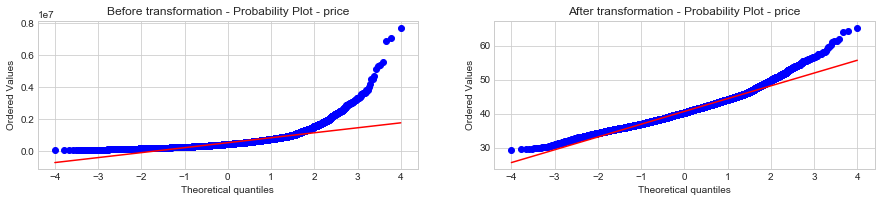

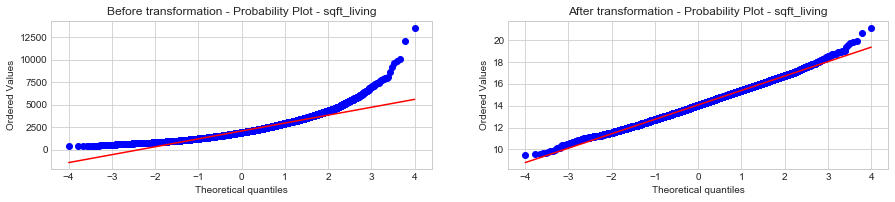

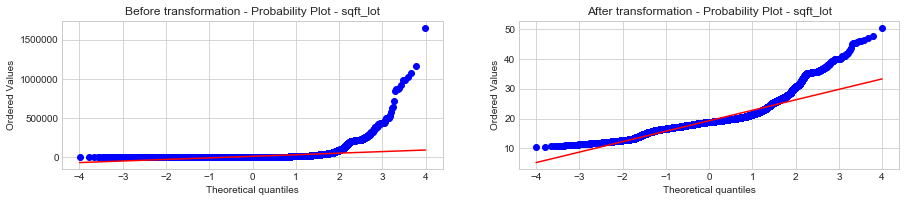

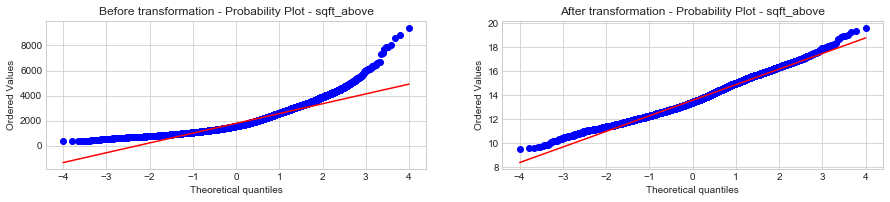

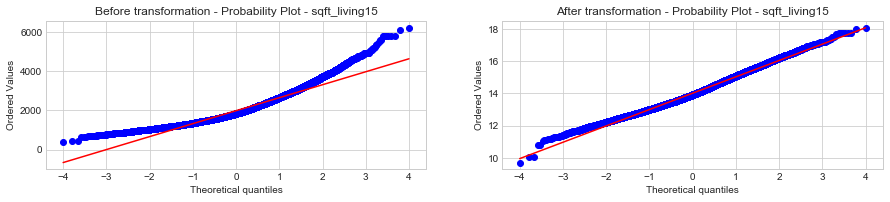

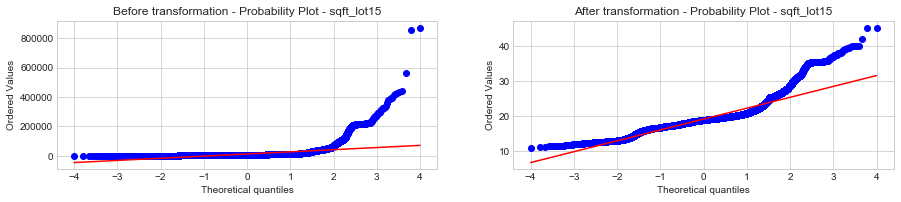

In [79]:
from scipy import stats

ppDF = df[['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_living15', 'sqft_lot15']]

for h in list(ppDF.columns):
    plt.figure(figsize = (15,6))
    plt.subplot(221)
    stats.probplot(vifDF[h], dist = 'norm', plot = plt)
    plt.title('Before transformation - Probability Plot - {}'.format(h))
    plt.subplot(222)
    stats.probplot(ppDF[h], dist = 'norm', plot = plt)
    plt.title('After transformation - Probability Plot - {}'.format(h))
    plt.show()
    

Based on probability plots, variables after transformation are closer to normal distribution even though some variables are still not normally distributed. However, variables 'sqft_above' and 'sqft_living15' are normally distributed after box-cox transformation.

## Modeling and Evaluation
Since the goal is to predict housing price in King County, different predictive models are applied for the prediction.
### Models
- **Ridge Regression**: Linear least squares with l2 regularization to reduce overfitting issue.
- **Random Forest Regression**: Random Forest makes the decision tree building process use different predictors to split at different times.
- **Gradient Bootsing Regression**: In Gradient Boosting, the decision trees are generated in sequence. Each tree is generated using information from previously grown trees and the addition of a new tree improves upon the performance of the previous trees.


In [80]:
from sklearn.model_selection import train_test_split

y = df.price
X = df.drop(['id', 'date', 'price', 'yr_built', 'zipcode', 'lat', 'long'], axis = 1)

#Split the data into training data and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


In [81]:
print(X_train.shape, X_test.shape)

(17282, 14) (4321, 14)


### Ridge Regression

In [83]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeCV

ridgeCV = RidgeCV(alphas = [0.001, 0.01, 0.1, 1, 10], scoring = 'neg_mean_squared_error', normalize = True, cv = 5)
ridgeCV.fit(X_train, y_train)

print('Test data score     : ',ridgeCV.score(X_test, y_test))
print('Training data score : ',ridgeCV.score(X_train, y_train))


Test data score     :  0.629247618078
Training data score :  0.618334226155


Ridge regression didn't perform well, with 62.9% accuracy rate. 

### Random Forest Regression

In [84]:
from sklearn import ensemble
randomForest = ensemble.RandomForestRegressor()
    
randomForest.set_params(random_state=42, min_samples_leaf = 70, n_jobs = -1, n_estimators = 500)
randomForest.fit(X_train, y_train.values.ravel())
        
print('Test data score     : ', randomForest.score(X_test, y_test))
print('Training data score : ', randomForest.score(X_train, y_train))    
 

Test data score     :  0.664314490415
Training data score :  0.677593177162


Random Forest Regression performs better than Ridge Regression, the accuracy increased from 62.9% to 66.4%.

### Gradient Boosting Regression

In [86]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
est = GradientBoostingRegressor(n_estimators = 700, learning_rate = 0.1,
      random_state = 42, loss = 'huber', criterion = 'friedman_mse',
      min_samples_split = 5,
      min_samples_leaf = 60).fit(X_train, y_train)

print('Test data score     : ', est.score(X_test, y_test))
print('Training data score : ', est.score(X_train, y_train))


Test data score     :  0.720511289726
Training data score :  0.744689618111


Gradient Boosting Regression so far has better results than Ridge and Random Forest Regression. With 72% accuracy.

### Feature Importance
Plot out the important features based on gradient boosting. 
- Top important features are features about square foot lot, square foot living and square foot above the ground.

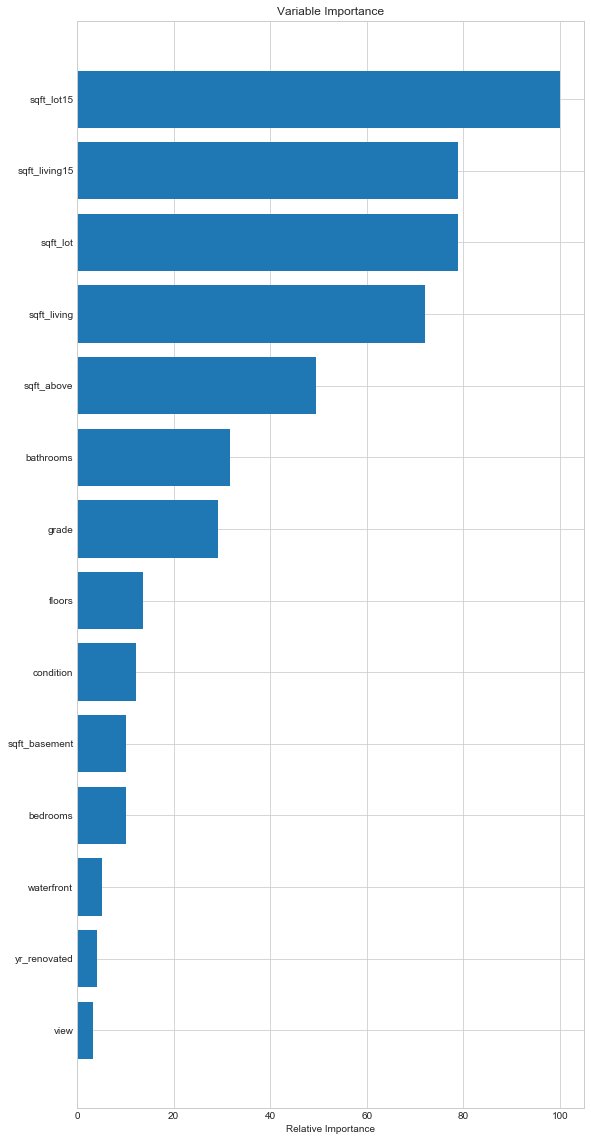

In [87]:
feature_importance = est.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(20,20))
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_test.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()


### Gridsearch Cross Validation- Gradient Boosting

In [91]:
grid_para_boosting = [{
    "criterion": ['friedman_mse', 'mse'],
    "max_depth": [1,2,3,4],    
    "max_features": [4,8],
    "min_samples_split": np.linspace(start=2, stop=8, num=10, dtype=int), 
    "random_state": [42]}]
grid_search_boosting = GridSearchCV(est, grid_para_boosting, cv=5, n_jobs=-1, verbose=1)
%time grid_search_boosting.fit(X_train, y_train.values.ravel())
    

Fitting 5 folds for each of 160 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 20.1min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 36.7min
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed: 37.2min finished


CPU times: user 16.3 s, sys: 2.39 s, total: 18.7 s
Wall time: 37min 21s


GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='huber', max_depth=3,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=60, min_samples_split=5,
             min_weight_fraction_leaf=0.0, n_estimators=700,
             presort='auto', random_state=42, subsample=1.0, verbose=0,
             warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'criterion': ['friedman_mse', 'mse'], 'max_depth': [1, 2, 3, 4], 'max_features': [4, 8], 'min_samples_split': array([2, 2, 3, 4, 4, 5, 6, 6, 7, 8]), 'random_state': [42]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [94]:
print('Best parameter     : ', grid_search_boosting.best_params_)
print('Test data score    : ', grid_search_boosting.score(X_test, y_test))
print('Training data score: ', grid_search_boosting.score(X_train, y_train))


Best parameter     :  {'criterion': 'friedman_mse', 'max_depth': 4, 'max_features': 4, 'min_samples_split': 2, 'random_state': 42}
Test data score    :  0.721614432648
Training data score:  0.758956656955


After applying grid search for tuning parameters, the accuracy increased to 72.16%

### Evaluation
Based on the predictive models above, Gradient Boosting Regression with Grid Search generates the best prediction result, because in boosting, the new decision tree is based on the residuals and is then added to the current decision tree, and the residuals are updated. By fitting small trees to the residuals, we gradually improve the overall model in areas where it does not perform well. Therefore, Gradient Boosting outperforms than Ridge and Random Forest Regression, but Gradient Boosting costs more time to run in order to find the best parameters.  